In [21]:
!pip install pandas
!pip install xlrd
!pip install openpyxl
!pip install matplotlib
!pip install seaborn

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_excel('food_band.xlsx')
print(len(df))
df = df.drop_duplicates()
print(len(df))

17225
17225


In [24]:
df.head(10)

,Name,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,geoData,global_id
0,СМЕТАНА,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",Контактный телефон: (499) 183-14-10,48,нет,Геоданные: ↴\nКоординаты: [\n 37.714565000436...,637376221
1,Родник,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",Контактный телефон: (495) 676-55-35,35,нет,Геоданные: ↴\nКоординаты: [\n 37.673306130034...,637376331
2,Кафе «Академия»,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, Абельмановская улица, дом 6",Контактный телефон: (495) 662-30-10,95,нет,Геоданные: ↴\nКоординаты: [\n 37.669647596938...,637376349
3,ГБОУ «Школа № 1430 имени Героя Социалистическо...,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",Контактный телефон: (499) 908-06-15,240,нет,"Геоданные: ↴\nКоординаты: [\n 37.56694,\n 55...",637376480
4,Брусника,да,Брусника,кафе,Центральный административный округ,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2",Контактный телефон: (495) 697-04-89,10,нет,"Геоданные: ↴\nКоординаты: [\n 37.59812754844,...",637376481
5,Буфет МТУСИ,нет,NaN,столовая,Юго-Восточный административный округ,район Лефортово,"город Москва, Авиамоторная улица, дом 8, строе...",Контактный телефон: (495) 673-89-78,90,нет,Геоданные: ↴\nКоординаты: [\n 37.715425391898...,637376500
6,Столовая МТУСИ,нет,NaN,столовая,Юго-Восточный административный округ,район Лефортово,"город Москва, Авиамоторная улица, дом 8, строе...",Контактный телефон: (495) 273-89-78,120,нет,Геоданные: ↴\nКоординаты: [\n 37.715425391898...,637376536
7,Кафе Гогиели,нет,NaN,кафе,Юго-Восточный административный округ,район Лефортово,"город Москва, Авиамоторная улица, дом 49/1",Контактный телефон: (495) 361-38-50,24,нет,Геоданные: ↴\nКоординаты: [\n 37.719950378859...,637376678
8,Алло Пицца,да,Алло Пицца,кафе,Новомосковский административный округ,поселение Щербинка,"город Москва, улица Авиаторов, дом 14",Контактный телефон: (495) 934-31-00,32,нет,Геоданные: ↴\nКоординаты: [\n 37.533280862092...,637376719
9,Гимназия 1542,нет,NaN,столовая,Новомосковский административный округ,поселение Щербинка,"город Москва, улица Авиаторов, дом 16",Контактный телефон: (495) 934-87-32,270,нет,Геоданные: ↴\nКоординаты: [\n 37.533839182416...,637376788


# Эксперимент №1 - Социальные привелегии

 ### Давайте посмотрим, есть ли зависимость в выдаче социальных привелегий от типа заведения

In [25]:
XI = df[df['SocialPrivileges'].isin(['да'])]

In [26]:
X_set = set()
Y_dict = dict()
for line in XI['TypeObject']:
    if line not in Y_dict:
        Y_dict[line] = 1
    else:
        Y_dict[line] += 1
    X_set.add(line)

In [27]:
X_set

{'буфет',
 'закусочная',
 'кафе',
 'кафетерий',
 'предприятие быстрого обслуживания',
 'ресторан',
 'столовая'}

In [28]:
Y_dict

{'столовая': 215,
 'ресторан': 4,
 'кафе': 23,
 'буфет': 20,
 'кафетерий': 2,
 'предприятие быстрого обслуживания': 2,
 'закусочная': 1}

In [29]:
X = list()
Y = list()
LABELS = list()
count = 0
for i in X_set:
    count += 1
    X.append(count)
    Y.append(Y_dict[i])
    if i == 'предприятие быстрого обслуживания':
        i = 'предприятие б.о.'
    LABELS.append(i)
print(X)
print(Y)

[1, 2, 3, 4, 5, 6, 7]
[1, 215, 20, 23, 4, 2, 2]


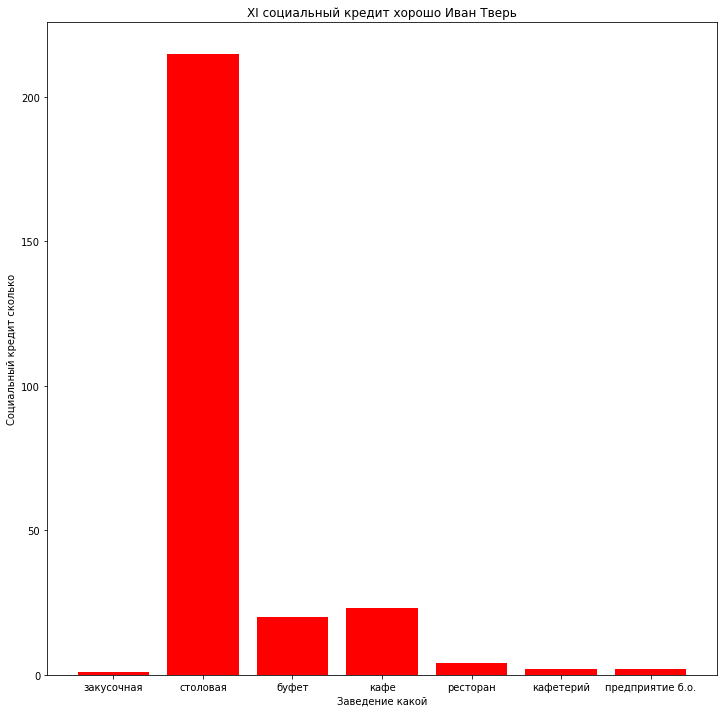

In [30]:
plt.figure(figsize = (12, 12))
plt.bar(X, Y, color='red')
plt.xticks(ticks = X, labels = LABELS)
plt.title('XI социальный кредит хорошо Иван Тверь')
plt.ylabel('Социальный кредит сколько')
plt.xlabel('Заведение какой')
plt.show()

### Хорошо, но давайте проверим общее количество всех заведений

In [31]:
X_set_all = set()
Y_count_object = dict()
for one in df['TypeObject']:
    if one not in Y_count_object:
        Y_count_object[one] = 1
    else:
        Y_count_object[one] += 1
    X_set_all.add(one)
print(Y_count_object)
print(X_set_all)

{'кафе': 6625, 'столовая': 2287, 'предприятие быстрого обслуживания': 2518, 'ресторан': 2297, 'кафетерий': 1009, 'буфет': 496, 'бар': 1133, 'закусочная': 474, 'магазин (отдел кулинарии)': 386}
{'закусочная', 'столовая', 'бар', 'магазин (отдел кулинарии)', 'буфет', 'кафе', 'ресторан', 'кафетерий', 'предприятие быстрого обслуживания'}


In [32]:
X = list()
Y = list()
LABELS = list()
count = 0
for i in X_set_all:
    count += 1
    X.append(count)
    Y.append(Y_count_object[i])
    if i == 'предприятие быстрого обслуживания':
        i = 'предприятие б.о.'
    LABELS.append(i)
print(X)
print(Y)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[474, 2287, 1133, 386, 496, 6625, 2297, 1009, 2518]


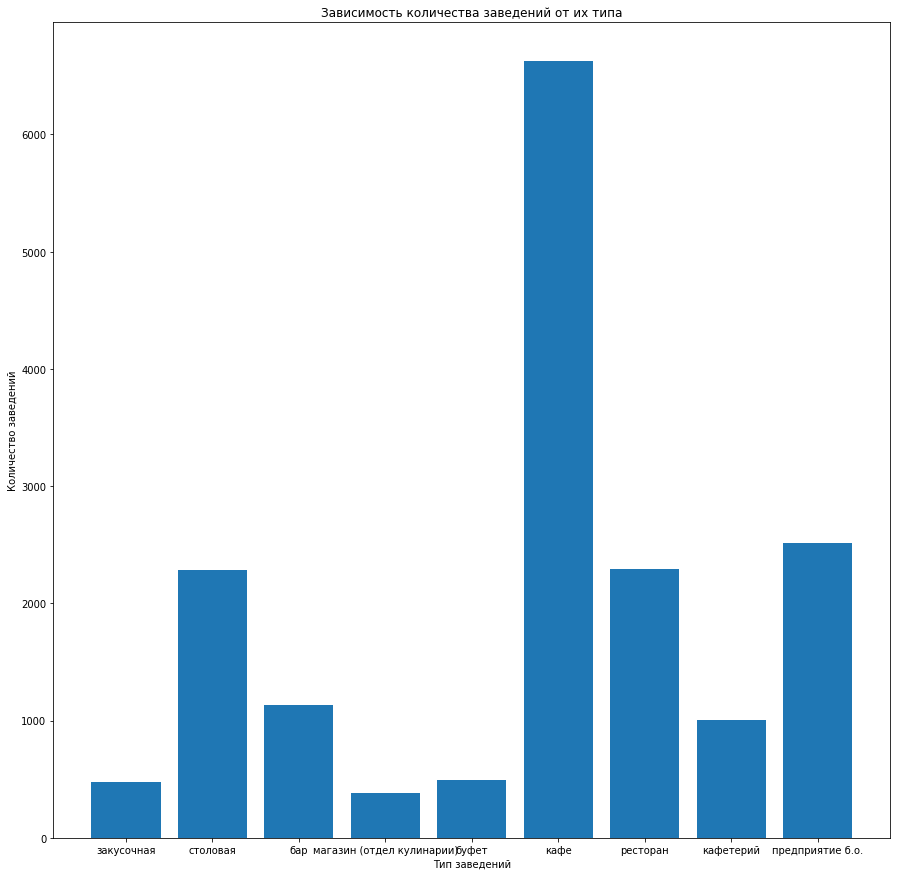

In [33]:
plt.figure(figsize = (15, 15))
plt.bar(X, Y)
plt.xticks(ticks = X, labels = LABELS)
plt.title('Зависимость количества заведений от их типа')
plt.ylabel('Количество заведений')
plt.xlabel('Тип заведений')
plt.show()

### И на десерт - посмотрим на процентное соотношение заведений, которые имеют социальные привелегии

In [44]:
X = list()
Y = list()
LABELS = list()
count = 0
for i in X_set:
    count += 1
    X.append(count)
    number = Y_dict[i] / Y_count_object[i] * 100
    Y.append(number)
    if i == 'предприятие быстрого обслуживания':
        i = 'предприятие б.о.'
    LABELS.append(i)
print(X)
print(LABELS)
print(Y)

[1, 2, 3, 4, 5, 6, 7]
['закусочная', 'столовая', 'буфет', 'кафе', 'ресторан', 'кафетерий', 'предприятие б.о.']
[0.21097046413502107, 9.40096195889812, 4.032258064516129, 0.3471698113207547, 0.174140182847192, 0.19821605550049554, 0.07942811755361398]


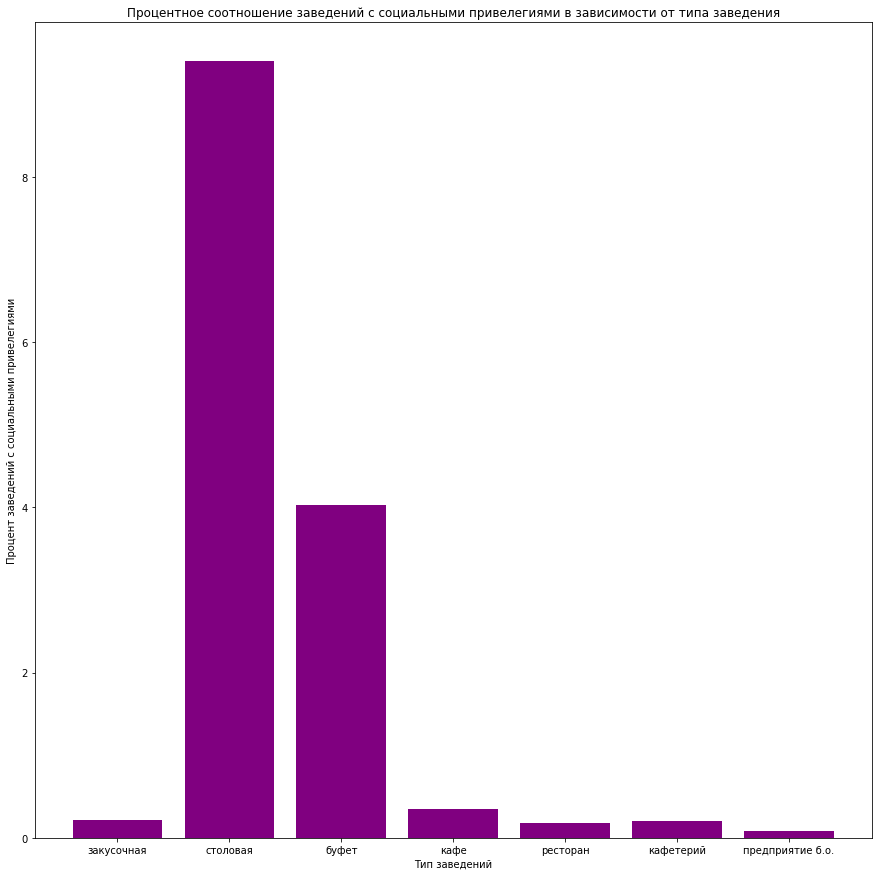

In [48]:
plt.figure(figsize = (15, 15))
plt.bar(X, Y, color='purple')
plt.xticks(ticks = X, labels = LABELS)
plt.title('Процентное соотношение заведений с социальными привелегиями в зависимости от типа заведения')
plt.ylabel('Процент заведений с социальными привелегиями')
plt.xlabel('Тип заведений')
plt.show()

### К Р У Т О Т А

# Эксперимент №2 - Зависимость количества посадочных мест от типа заведения

In [34]:
print(X_set_all)

{'закусочная', 'столовая', 'бар', 'магазин (отдел кулинарии)', 'буфет', 'кафе', 'ресторан', 'кафетерий', 'предприятие быстрого обслуживания'}


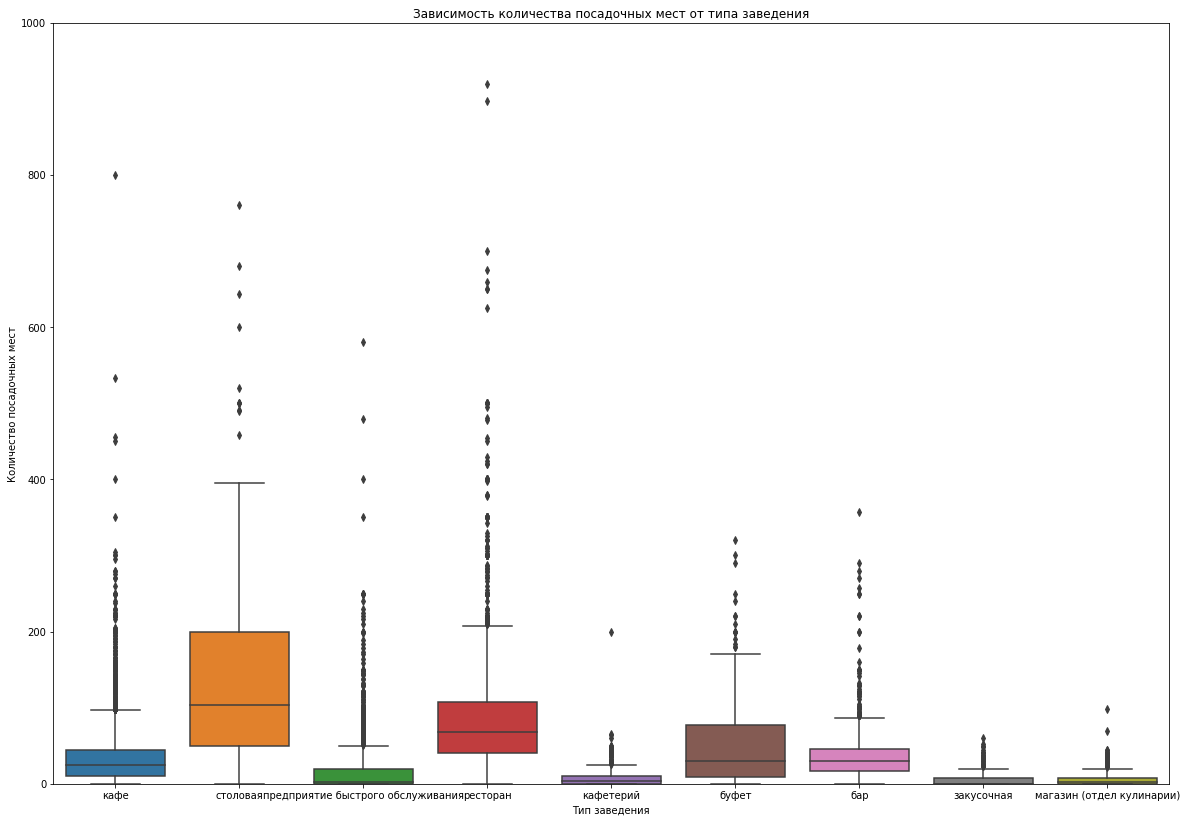

In [35]:
plt.figure(figsize = (20, 14))
sns.boxplot(x='TypeObject', y='SeatsCount', data=df)
plt.ylim(0, 1000)
plt.title('Зависимость количества посадочных мест от типа заведения')
plt.ylabel('Количество посадочных мест')
plt.xlabel('Тип заведения');